In [1]:
import numpy as np
from scipy import optimize
import random

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
from inauguralproject import ExchangeEconomyClass

market = ExchangeEconomyClass()

# Question 1
## Basic Edgeworth box

In [2]:
# Creating Pareto efficient points

# 1 Create x1A and x2A vectors
N = 75
x1A_vec = np.linspace(0,1,N)
x2A_vec = np.linspace(0,1,N)

# 2 Define utility when consuming endowment
uA_bar = market.utility_A(market.par.w1A, market.par.w2A)
uB_bar = market.utility_B(market.par.w1B, market.par.w2B)

# 3 Create pareto combinations
kombinationer = market.paretoC(x1A_vec, x2A_vec, uA_bar, uB_bar)

print(f'{len(kombinationer)} out of {75*75} combinations satisfy C')

1543 out of 5625 combinations satisfy C


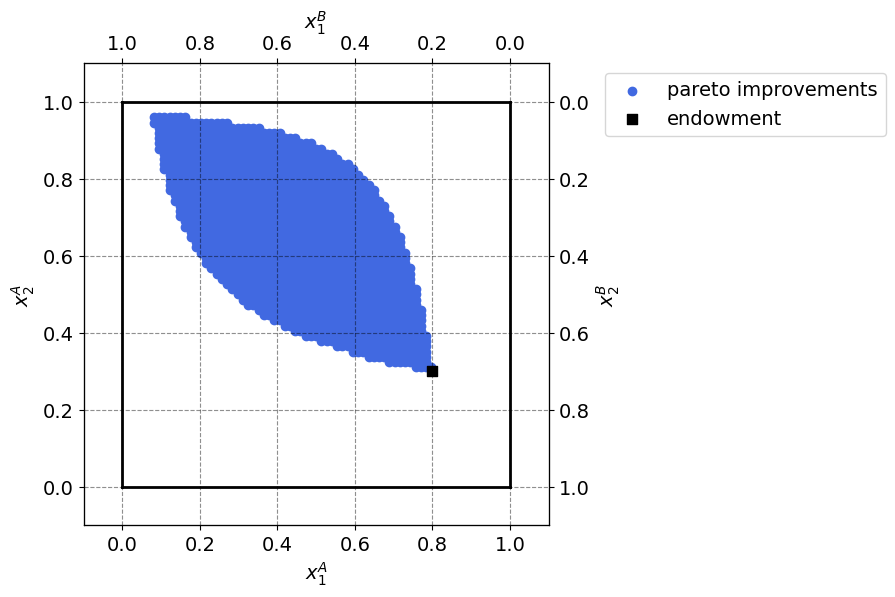

In [3]:
x1, x2 = zip(*kombinationer)

from inauguralproject import plot_edgeworth
plot_edgeworth(x1, x2, market.par.w1A, market.par.w2A)

# Question 2
## Market error

In [4]:
# 1 Create price vector P_1 from 0.5 to 2.5
N = 75
P_1 = [0.5]

i = 1
while P_1[-1] < 2.5:
    P_1.append(0.5 + (2*i)/N)
    i += 1    

# 2 Calculate market clearing price from P_1
e1_best, e2_best, p1_best = market.market_clear(P_1)

print(f'Market clearing price = {p1_best:.4f}')

Market clearing price = 0.9533


In [5]:
%matplotlib inline
import ipywidgets as widgets

widgets.interact(
    market.plot_error,
N=widgets.fixed(N),
p1=widgets.FloatSlider(min=0.25, max=2.5, step=0.01, value = 0.94),
)

interactive(children=(FloatSlider(value=0.94, description='p1', max=2.5, min=0.25, step=0.01), Output()), _dom…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

# Question 3
## Market clearing price

$
x_1^{A*} (p_1,\omega^A) + x_1^{B*}(p_1,\omega^B) = 1 \Leftrightarrow$

$\alpha \frac{p_1 w_1^A+w_2^A}{p_1} + \beta \frac{p_1 w_1^A+w_2^B}{p_1} = 1 \Leftrightarrow$

$p_1 (1-\alpha w_1^A-\beta w_1^B) = \alpha w_2^A+\beta w_2^B \Leftrightarrow$

$p_1^* = \frac{\alpha w_2^A+\beta w_2^B}{1-\alpha w_1^A-\beta w_1^B}$

In [8]:
par = market.par
p1_star = (par.alpha*par.w2A+par.beta*par.w2B)/(1-par.alpha*par.w1A - par.beta*par.w1B)

print(f'Numerical market clearing price = {p1_best:.4f}')
print(f'Analytical market clearing price = {p1_star:.4f}\n')

market_eps_A = market.check_market_clearing(p1_best)
market_eps_B = market.check_market_clearing(p1_star)

print(f'Market error for numerical approach = {market_eps_A[0]:.5f}, {market_eps_A[1]:.5f}')
print(f'Market error for analytical approach= {market_eps_B[0]:.5f}, {market_eps_B[1]:.5f}')

Numerical market clearing price = 0.9533
Analytical market clearing price = 0.9444

Market error for numerical approach = -0.00559, 0.00533
Market error for analytical approach= 0.00000, 0.00000


# Question 4a
## Max utility_A in P_1

In [14]:
uA_0 = -np.inf

for p1 in P_1:
    x1_A = 1 - market.demand_B(p1)[0]
    x2_A = 1 - market.demand_B(p1)[1]
    uA_now = market.utility_A(x1_A, x2_A)
    if uA_now > uA_0:
        uA_0 = uA_now
        uA_best = uA_now
        x1_A_best = x1_A
        x2_A_best = x2_A
        p1_A_best = p1

A_sets_price = x1_A_best, x2_A_best 

print(f"utility of A: {uA_best:.4f} \nconsumption of good 1: {x1_A_best:.4f} \nconsumption of good 2: {x2_A_best:.4f}\nThe optimal price: {p1_A_best:.4f}")

utility of A: 0.6336 
consumption of good 1: 0.6193 
consumption of good 2: 0.6409
The optimal price: 1.8867


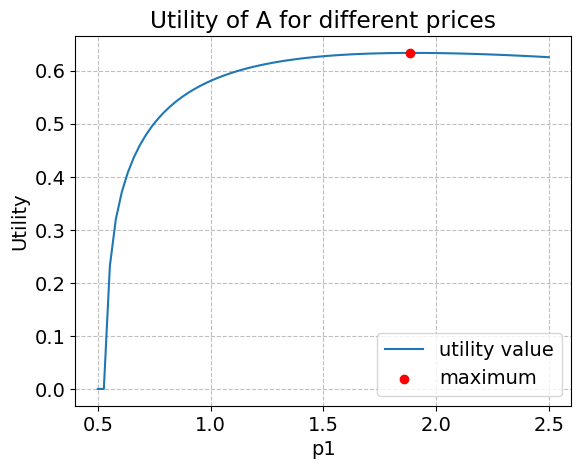

In [17]:
import matplotlib.pyplot as plt  
# Plot utility of A for different prices

# Create an empty list to store the utility values
utility_values = []

# Iterate over each value of p1 in P_1
for p1 in P_1:
    x1_A = 1 - market.demand_B(p1)[0]
    x2_A = 1 - market.demand_B(p1)[1]
    # Calculate the utility for the given p1
    utility = market.utility_A(x1_A, x2_A)
    utility_values.append(utility)

# Plot the utility values
plt.plot(P_1, utility_values, label = "utility value")
plt.scatter(p1_A_best, uA_best, c="red", zorder=10, label = "maximum")  
plt.ylabel('Utility')
plt.xlabel('p1')
plt.title('Utility of A for different prices')
plt.legend()
plt.show()


# Question 4b
## Max utility_A in p1 > 0

In [18]:
# Call an optimizer to solve the problem

# a. define objective function to minimize as a function of p
obj = lambda p: -market.utility_A(1 - market.demand_B(p)[0], 1 - market.demand_B(p)[1]) 

# b. define bounds
bounds = (1e-8, 100)

# c. intitial guess and call optimizer
p0 = 1
result = optimize.minimize(obj,p0,method='SLSQP')


#sol.p1 = result.x[0]

p = result.x[0]
util = -result.fun
print(f'optimal price = {p:.4f}\noptimal utility = {util:.4f}')

optimal price = 1.8968
optimal utility = 0.6336


In [20]:
# Compare with numerical optimization

print(f'Restricted price = {p1_A_best:.4f}\nRestricted utility = {uA_best:.4f}\n')
print(f'Unrestricted price = {p:.4f}\nUnrestricted utility = {util:.4f}\n')

diff = util - uA_best

print(f'difference in utility = {diff:.7f}')

Restricted price = 1.8867
Restricted utility = 0.6336

Unrestricted price = 1.8968
Unrestricted utility = 0.6336

difference in utility = 0.0000047


# Question 5a

In [21]:
kombinationer[0][1]

util_0 = 0

for i in kombinationer:
    util_now = market.utility_A(*i)
    if util_now > util_0:
        util_0 = util_now
        util_best = util_now
        x1_best, x2_best = i

market_maker = x1_best, x2_best

print(f'x1A = {x1_best:.4f}')
print(f'x2A = {x2_best:.4f}')
print(f'utility = {util_best:.4f}')




x1A = 0.5811
x2A = 0.8378
utility = 0.7416


## Question 5B

In [22]:
# Call an optimizer to solve the problem in two dimensions

# a. define objective function to minimize as a function of x1 and x2
def value_of_choice(x):
    return -market.utility_A(x[0], x[1]) 

# b. define bounds and restrictions
bounds = [(0, 1), (0, 1)]
constraints = ({'type': 'eq', 'fun': lambda x: market.utility_B(1 - x[0], 1 - x[1]) - uB_bar})

# c. intitial guess and call optimizer
guess = [market.par.w1A, market.par.w2A]
result = optimize.minimize(value_of_choice, guess, bounds = bounds, constraints = constraints, method='SLSQP')


x1_5b = result.x[0]
x2_5b = result.x[1]
util_5b = -result.fun
print(f'allocation = {x1_5b:.4f}, {x2_5b:.4f}\nmaximum utility = {util_5b:.4f}\n')

print(f'difference in utility = {util_5b - util_best:.4f}')

allocation = 0.5757, 0.8444
maximum utility = 0.7432

difference in utility = 0.0016


## Question 6a

In [23]:
# Opgave 6A

def value_of_choice(x):
    return -market.utility_A(x[0], x[1]) -market.utility_B(1 - x[0], 1 - x[1])

# b. define bounds and restrictions
bounds = [(0, 1), (0, 1)]

# c. intitial guess and call optimizer
guess = [market.par.w1A, market.par.w2A]
result = optimize.minimize(value_of_choice, guess, bounds = bounds, method='SLSQP')

print(result.x[0])
print(result.x[1])

print(-result.fun)


0.3334399256734374
0.6668016053890844
1.0582673636411322


## Question 6B


In [ ]:
# Illustrate and compare with your results in euqstions 3)-6)

# 3: Market clearing allocation
# 4: consumer A chooses the price
# 5: consumer A chooses B's consumption, chooses Pareto point
# 6: Social planner chooses the optimal point

# a. illustrate the points in the Edgeworth box
# b. compare utilities for A and B

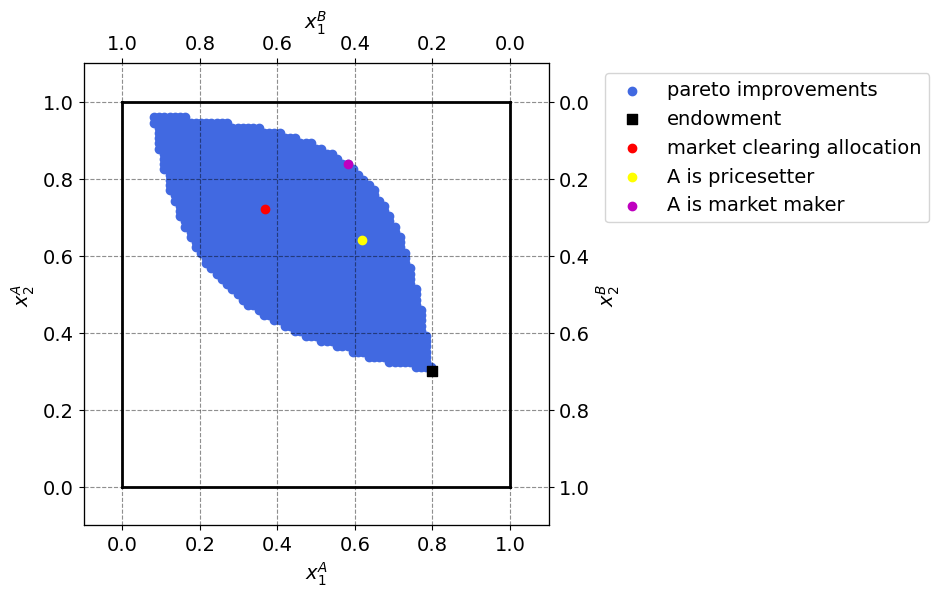

In [28]:
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

par = market.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
# Market clearing combination
market_clearing = market.demand_A(p1_best)

x1, x2 = zip(*kombinationer)
ax_A.scatter(x1,x2,marker='o',color='royalblue',label='pareto improvements')
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment', s = 50)

# Allocations
ax_A.scatter(market_clearing[0],market_clearing[1], color = "red", label = "market clearing allocation")
ax_A.scatter(A_sets_price[0],A_sets_price[1], color = "yellow", label = "A is pricesetter")
ax_A.scatter(market_maker[0],market_maker[1], color = "m", label = "A is market maker")

# opg 8

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,bbox_to_anchor=(1.1,1.0));

# Lav widget

In [79]:
market.utility_A(market_clearing[0], market_clearing[1])
market.utility_A(A_sets_price[0],A_sets_price[1])
market.utility_A(market_maker[0],market_maker[1])


0.741627044262768

# Question 7

In [24]:
import random

random.seed(2024)

def W_float():
    wList = []
    for i in range(200):
        w_a = random.uniform(0, 1)
        w_b = random.uniform(0, 1)
        wList.append((w_a, w_b))
    return wList
wlist = W_float()
print((wlist[0]))

(0.47009071843107064, 0.7282642914232076)


# Question 8

In [25]:
uA_bar = market.utility_A(market.par.w1A, market.par.w2A)
uB_bar = market.utility_B(market.par.w1B, market.par.w2B)
def counttupples(wlist,uA_bar,uB_bar): 
    finallst = []
    for i in range(len(wlist)):
        x1a = wlist[i][0]
        x2a = wlist[i][1]
        uA = market.utility_A(x1a, x2a)
        x1b = 1 - x1a
        x2b = 1 - x2a
        uB = market.utility_B(x1b, x2b)
        if uA >= uA_bar and uB >= uB_bar:
            finallst.append((x1a, x2a))
    return(finallst)
belongToC = (counttupples(wlist,uA_bar,uB_bar))
print(len(belongToC))
print(belongToC)



59
[(0.47009071843107064, 0.7282642914232076), (0.3037513583913575, 0.8872982690000151), (0.41008858946872573, 0.7166143935816427), (0.4158721009442904, 0.727759134886051), (0.7040597821044818, 0.5193507229884871), (0.20638183272795785, 0.7525906989551181), (0.4685332173457043, 0.7090348812304769), (0.49334177818512226, 0.8365136133737727), (0.1698154262011824, 0.6955897269235669), (0.20691064433024053, 0.686573222767188), (0.7038401233828459, 0.35028548708964014), (0.26362584890459495, 0.5236985525454059), (0.35461123846566256, 0.70254540362515), (0.5839360937396286, 0.7318404403706629), (0.10429735341211088, 0.9435972988171141), (0.6315108465416529, 0.5953851201233223), (0.5600331588076879, 0.5442852280908532), (0.6353489149909375, 0.6248969113338434), (0.21728086769732446, 0.5863302340112369), (0.44873287427215935, 0.41842218931304664), (0.7526277615087171, 0.35668003153300587), (0.752110768160866, 0.4192204300953164), (0.4646169286560333, 0.4964112233162923), (0.2556785990752374, 0

In [30]:
N = 150

P_1 = []
i = 0
P_1.append(0.5)

while P_1[i] < 2.5:
    i += 1
    P_1.append(0.5 + (2*i)/N)

print(P_1)
print(len(P_1))

[0.5, 0.5133333333333333, 0.5266666666666666, 0.54, 0.5533333333333333, 0.5666666666666667, 0.58, 0.5933333333333334, 0.6066666666666667, 0.62, 0.6333333333333333, 0.6466666666666667, 0.66, 0.6733333333333333, 0.6866666666666666, 0.7, 0.7133333333333334, 0.7266666666666667, 0.74, 0.7533333333333334, 0.7666666666666666, 0.78, 0.7933333333333333, 0.8066666666666666, 0.8200000000000001, 0.8333333333333333, 0.8466666666666667, 0.86, 0.8733333333333333, 0.8866666666666667, 0.9, 0.9133333333333333, 0.9266666666666667, 0.94, 0.9533333333333334, 0.9666666666666667, 0.98, 0.9933333333333334, 1.0066666666666668, 1.02, 1.0333333333333332, 1.0466666666666666, 1.06, 1.0733333333333333, 1.0866666666666667, 1.1, 1.1133333333333333, 1.1266666666666667, 1.1400000000000001, 1.1533333333333333, 1.1666666666666665, 1.1800000000000002, 1.1933333333333334, 1.2066666666666666, 1.22, 1.2333333333333334, 1.2466666666666666, 1.26, 1.2733333333333334, 1.2866666666666666, 1.3, 1.3133333333333335, 1.32666666666666

In [31]:
marketeq = ExchangeEconomyClass()
#N = 20000
#P_1 = np.linspace(1e-10, 10, N)
x1_eq = []
p1_eq =[]
#belongToC[0] = market.par.w1A, market.par.w2A
#print(belongToC[1][0])
#print(belongToC[1][1])

e1 = 10
e2 = 10

for i in range(len(belongToC)):
    for p1 in P_1:
        marketeq.par.w1A = belongToC[i][0]
        marketeq.par.w2A = belongToC[i][1]
        marketeq.par.w1B = 1 - marketeq.par.w1A
        marketeq.par.w2B = 1 - marketeq.par.w2A

        e1_now, e2_now = marketeq.check_market_clearing(p1)
        if np.abs(e1_now) < np.abs(e1) and np.abs(e2_now) < np.abs(e2):
            e1 = e1_now
            e2 = e2_now
            e1_best = e1_now
            e2_best = e2_now
            p1_best = p1
    e1 = 10
    e2 = 10
    p1_eq.append(p1_best)
    x1_eq.append(marketeq.demand_A(p1_best)) 

print(p1_eq)
print(x1_eq)

[0.86, 0.86, 0.9133333333333333, 0.9, 0.8733333333333333, 1.0333333333333332, 0.8733333333333333, 0.78, 1.1133333333333333, 1.0866666666666667, 0.9666666666666667, 1.1666666666666665, 0.9533333333333334, 0.8066666666666666, 0.9533333333333334, 0.86, 0.9266666666666667, 0.8466666666666667, 1.1666666666666665, 1.0866666666666667, 0.94, 0.9, 1.02, 1.0066666666666668, 0.9666666666666667, 0.8333333333333333, 1.0733333333333333, 0.9933333333333334, 1.1, 0.86, 0.8200000000000001, 0.9933333333333334, 0.98, 0.9533333333333334, 0.9266666666666667, 1.0733333333333333, 0.98, 0.8866666666666667, 1.1, 0.9666666666666667, 0.8866666666666667, 1.1266666666666667, 1.0333333333333332, 1.02, 0.8866666666666667, 0.8333333333333333, 1.1133333333333333, 0.8866666666666667, 0.9933333333333334, 1.1400000000000001, 0.8733333333333333, 0.8066666666666666, 0.9266666666666667, 0.8333333333333333, 0.8733333333333333, 1.0333333333333332, 0.9533333333333334, 0.7533333333333334, 0.9666666666666667]
[(0.438969887315476

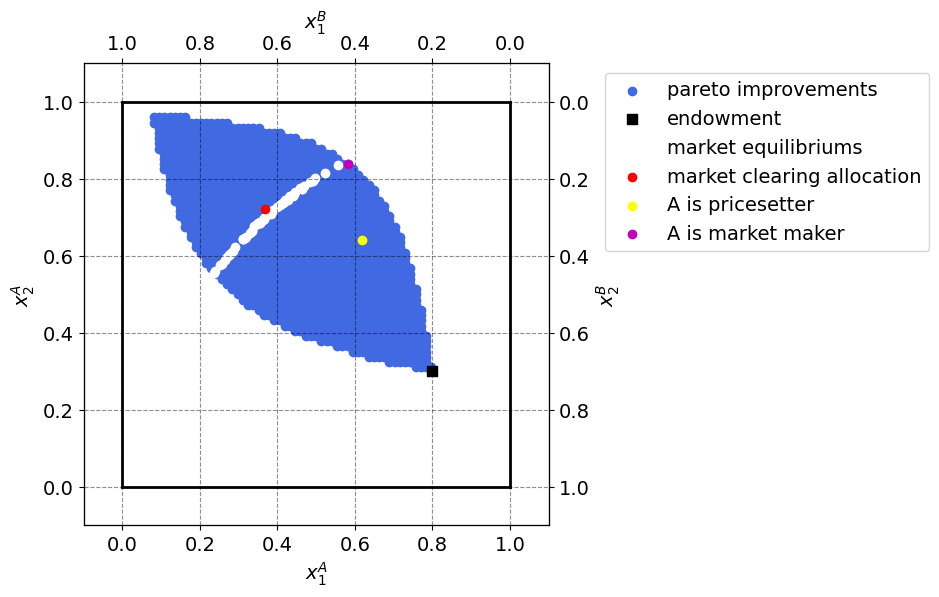

In [32]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

par = market.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
x1, x2 = zip(*kombinationer)
ax_A.scatter(x1,x2,marker='o',color='royalblue',label='pareto improvements')
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment', s = 50)

# Allocations
x1_8, x2_8 = zip(*x1_eq)
ax_A.scatter(x1_8,x2_8,marker='o',color='white',label='market equilibriums')
ax_A.scatter(market_clearing[0],market_clearing[1], color = "red", label = "market clearing allocation")
ax_A.scatter(A_sets_price[0],A_sets_price[1], color = "yellow", label = "A is pricesetter")
ax_A.scatter(market_maker[0],market_maker[1], color = "m", label = "A is market maker")

# opg 8

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,bbox_to_anchor=(1.1,1.0));

# Lav widget